# Importing libraries

In [286]:
import pandas as pd
import numpy as np
from string2string.distance import LevenshteinEditDistance
from string2string.distance import JaccardIndex
from string2string.similarity import JaroSimilarity
from string2string.misc import Tokenizer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import re
from nltk.stem import PorterStemmer

# Uploading csv file to df

In [276]:
df = pd.read_csv('Amzon_Google.csv', encoding='latin-1', delimiter=';')

df.head()

,Amazon,Google,Match
0,clickart 950 000 - premier image pack (dvd-rom),clickart 950000 - premier image pack (dvd-rom),1
1,noah's ark activity center (jewel case ages 3-8),the beginners bible: noah's ark activity cente...,1
2,peachtree by sage premium accounting for nonpr...,sage (ptree) - vernfp2007rt - premium accounti...,1
3,singing coach unlimited,singing coach unlimited - electronic learning ...,1
4,adobe after effects professional 6.5 upgrade f...,adobe software 22070152 after effects 6.5 pbupgrd,1


# Task 1 - Describe the data

In [277]:
df.shape

(2600, 3)

As we can see there are 2600 rows and 3 columns

In [278]:
df.describe()

,Match
count,2600.000000
mean,0.500000
std,0.500096
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


First and Second Column consist of characters

Meanwhile the last column consist of 0's and 1's, the mean value of last column is 0.5 which means that our data is balanced

# Task 2

## Task 2.a - Levenshtein distance

In [279]:
edit_dist = LevenshteinEditDistance()
df['Levenshtein distance'] = None

for i in range(df.shape[0]):
    df.iloc[i, 3]  = edit_dist.compute(df.iloc[i, 0], df.iloc[i, 1])

df

,Amazon,Google,Match,Levenshtein distance
0,clickart 950 000 - premier image pack (dvd-rom),clickart 950000 - premier image pack (dvd-rom),1,1.0
1,noah's ark activity center (jewel case ages 3-8),the beginners bible: noah's ark activity cente...,1,41.0
2,peachtree by sage premium accounting for nonpr...,sage (ptree) - vernfp2007rt - premium accounti...,1,23.0
3,singing coach unlimited,singing coach unlimited - electronic learning ...,1,31.0
4,adobe after effects professional 6.5 upgrade f...,adobe software 22070152 after effects 6.5 pbupgrd,1,58.0
...,...,...,...,...
2595,shapes,aspyr media inc enemy territory: quake wars,0,39.0
2596,dragon naturally speaking standard v9,print shop deluxe 21,0,30.0
2597,mediarecover,sony media software acid pro 5 music productio...,0,46.0
2598,mediarecover,instant immersion italian 2.0,0,25.0


## Task 2.b - Jaccard distance

In [280]:
jaccard_distance = JaccardIndex()
df['Jaccard distance'] = None

for i in range(df.shape[0]):
    df.iloc[i, 4]  = jaccard_distance.compute(tokenizer.tokenize(df.iloc[i, 0]), tokenizer.tokenize(df.iloc[i, 1]))

df

,Amazon,Google,Match,Levenshtein distance,Jaccard distance
0,clickart 950 000 - premier image pack (dvd-rom),clickart 950000 - premier image pack (dvd-rom),1,1.0,0.333333
1,noah's ark activity center (jewel case ages 3-8),the beginners bible: noah's ark activity cente...,1,41.0,0.666667
2,peachtree by sage premium accounting for nonpr...,sage (ptree) - vernfp2007rt - premium accounti...,1,23.0,0.454545
3,singing coach unlimited,singing coach unlimited - electronic learning ...,1,31.0,0.571429
4,adobe after effects professional 6.5 upgrade f...,adobe software 22070152 after effects 6.5 pbupgrd,1,58.0,0.666667
...,...,...,...,...,...
2595,shapes,aspyr media inc enemy territory: quake wars,0,39.0,1.0
2596,dragon naturally speaking standard v9,print shop deluxe 21,0,30.0,1.0
2597,mediarecover,sony media software acid pro 5 music productio...,0,46.0,1.0
2598,mediarecover,instant immersion italian 2.0,0,25.0,1.0


## Task 2.c - Jaro distance (at the character level) 

In [281]:
jaro_similarity = JaroSimilarity()
df['Jaro distance char'] = None

for i in range(df.shape[0]):
    df.iloc[i, 5]  = 1 - jaro_similarity.compute(df.iloc[i, 0], df.iloc[i, 1])

df

,Amazon,Google,Match,Levenshtein distance,Jaccard distance,Jaro distance char
0,clickart 950 000 - premier image pack (dvd-rom),clickart 950000 - premier image pack (dvd-rom),1,1.0,0.333333,0.086802
1,noah's ark activity center (jewel case ages 3-8),the beginners bible: noah's ark activity cente...,1,41.0,0.666667,0.362756
2,peachtree by sage premium accounting for nonpr...,sage (ptree) - vernfp2007rt - premium accounti...,1,23.0,0.454545,0.269958
3,singing coach unlimited,singing coach unlimited - electronic learning ...,1,31.0,0.571429,0.191358
4,adobe after effects professional 6.5 upgrade f...,adobe software 22070152 after effects 6.5 pbupgrd,1,58.0,0.666667,0.35389
...,...,...,...,...,...,...
2595,shapes,aspyr media inc enemy territory: quake wars,0,39.0,1.0,0.49677
2596,dragon naturally speaking standard v9,print shop deluxe 21,0,30.0,1.0,0.486729
2597,mediarecover,sony media software acid pro 5 music productio...,0,46.0,1.0,0.462698
2598,mediarecover,instant immersion italian 2.0,0,25.0,1.0,0.542146


## Task 2.d - Jaro distance

In [282]:
tokenizer = Tokenizer(word_delimiter=' ')

df['Jaro distance word'] = None

for i in range(df.shape[0]):
    df.iloc[i, 6] = 1 - jaro_similarity.compute(tokenizer.tokenize(df.iloc[i, 0]), tokenizer.tokenize(df.iloc[i, 1]))

df

,Amazon,Google,Match,Levenshtein distance,Jaccard distance,Jaro distance char,Jaro distance word
0,clickart 950 000 - premier image pack (dvd-rom),clickart 950000 - premier image pack (dvd-rom),1,1.0,0.333333,0.086802,0.130952
1,noah's ark activity center (jewel case ages 3-8),the beginners bible: noah's ark activity cente...,1,41.0,0.666667,0.362756,0.430556
2,peachtree by sage premium accounting for nonpr...,sage (ptree) - vernfp2007rt - premium accounti...,1,23.0,0.454545,0.269958,0.216667
3,singing coach unlimited,singing coach unlimited - electronic learning ...,1,31.0,0.571429,0.191358,0.190476
4,adobe after effects professional 6.5 upgrade f...,adobe software 22070152 after effects 6.5 pbupgrd,1,58.0,0.666667,0.35389,0.342857
...,...,...,...,...,...,...,...
2595,shapes,aspyr media inc enemy territory: quake wars,0,39.0,1.0,0.49677,1.0
2596,dragon naturally speaking standard v9,print shop deluxe 21,0,30.0,1.0,0.486729,1.0
2597,mediarecover,sony media software acid pro 5 music productio...,0,46.0,1.0,0.462698,1.0
2598,mediarecover,instant immersion italian 2.0,0,25.0,1.0,0.542146,1.0


# Task 3 - Plot ROC curves for the methods above

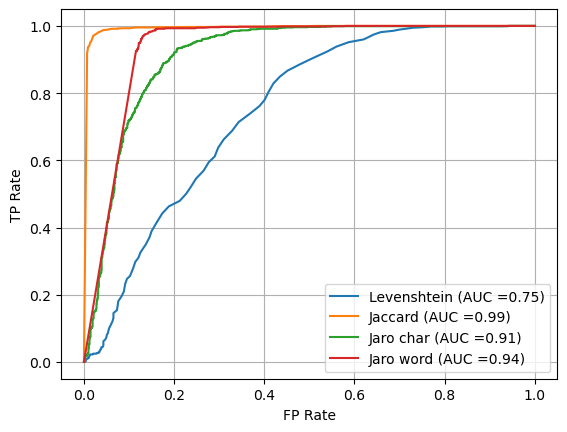

In [284]:
name = ['Levenshtein', 'Jaccard', 'Jaro char', 'Jaro word']

for i in range(3, 7):
    y = np.array(df.iloc[:, 2]).transpose()
    pred = np.array(df.iloc[:, i]).transpose()

    fpr, tpr, thresholds = roc_curve(y, pred, pos_label = 0)
    roc_auc = round(metrics.auc(fpr, tpr), 2)
    plt.plot(fpr, tpr, label = name[i - 3] + ' (AUC =' + str(roc_auc) + ')')
    plt.legend()
    
plt.xlabel("FP Rate")
plt.ylabel("TP Rate")
plt.grid()
plt.show()    


# Task 4

# Task 5 - Propose string pre-processing that can improve results, report results

In [289]:
def preprocess_string(text):
    text = text.lower()    
    text = re.sub(r'[^a-z\s]', '', text)
    stemmer = PorterStemmer()
    words = text.split()
    return ' '.join([stemmer.stem(word) for word in words])    

In [290]:
df = pd.read_csv('Amzon_Google.csv', encoding='latin-1', delimiter=';')

for i in range(df.shape[0]):
    df.iloc[i, 0] = preprocess_string(df.iloc[i, 0])
    df.iloc[i, 1] = preprocess_string(df.iloc[i, 1])
    
df

,Amazon,Google,Match
0,clickart premier imag pack dvdrom,clickart premier imag pack dvdrom,1
1,noah ark activ center jewel case age,the beginn bibl noah ark activ center activ ce...,1
2,peachtre by sage premium account for nonprofit,sage ptree vernfprt premium account for nonprofit,1
3,sing coach unlimit,sing coach unlimit electron learn product,1
4,adob after effect profession upgrad from stand...,adob softwar after effect pbupgrd,1
...,...,...,...
2595,shape,aspyr media inc enemi territori quak war,0
2596,dragon natur speak standard v,print shop delux,0
2597,mediarecov,soni media softwar acid pro music product softwar,0
2598,mediarecov,instant immers italian,0


In [291]:
edit_dist = LevenshteinEditDistance()
df['Levenshtein distance'] = None

for i in range(df.shape[0]):
    df.iloc[i, 3]  = edit_dist.compute(df.iloc[i, 0], df.iloc[i, 1])

jaccard_distance = JaccardIndex()
df['Jaccard distance'] = None

for i in range(df.shape[0]):
    df.iloc[i, 4]  = jaccard_distance.compute(tokenizer.tokenize(df.iloc[i, 0]), tokenizer.tokenize(df.iloc[i, 1]))

jaro_similarity = JaroSimilarity()
df['Jaro distance char'] = None

for i in range(df.shape[0]):
    df.iloc[i, 5]  = 1 - jaro_similarity.compute(df.iloc[i, 0], df.iloc[i, 1])

tokenizer = Tokenizer(word_delimiter=' ')

df['Jaro distance word'] = None

for i in range(df.shape[0]):
    df.iloc[i, 6] = 1 - jaro_similarity.compute(tokenizer.tokenize(df.iloc[i, 0]), tokenizer.tokenize(df.iloc[i, 1]))


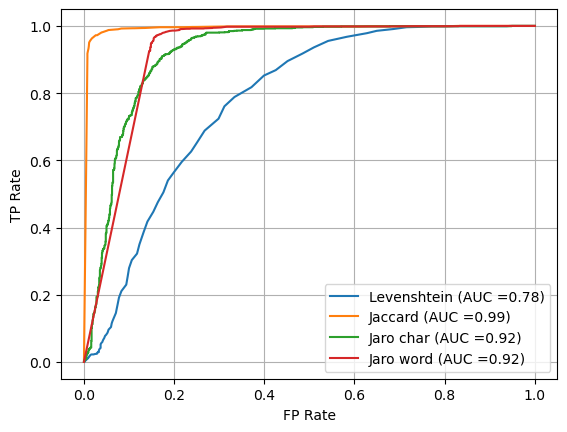

In [292]:
name = ['Levenshtein', 'Jaccard', 'Jaro char', 'Jaro word']

for i in range(3, 7):
    y = np.array(df.iloc[:, 2]).transpose()
    pred = np.array(df.iloc[:, i]).transpose()

    fpr, tpr, thresholds = roc_curve(y, pred, pos_label = 0)
    roc_auc = round(metrics.auc(fpr, tpr), 2)
    plt.plot(fpr, tpr, label = name[i - 3] + ' (AUC =' + str(roc_auc) + ')')
    plt.legend()
    
plt.xlabel("FP Rate")
plt.ylabel("TP Rate")
plt.grid()
plt.show()   

# Task 6 - Propose a combination of character- and word-level distances that can improve results, experiment with further methods, report results

In [339]:
df = pd.read_csv('Amzon_Google.csv', encoding='latin-1', delimiter=';')

for i in range(df.shape[0]):
    df.iloc[i, 0] = preprocess_string(df.iloc[i, 0])
    df.iloc[i, 1] = preprocess_string(df.iloc[i, 1])

edit_dist = LevenshteinEditDistance()
df['Levenshtein distance char'] = None

for i in range(df.shape[0]):
    df.iloc[i, 3]  = edit_dist.compute(df.iloc[i, 0], df.iloc[i, 1])

edit_dist = LevenshteinEditDistance()
df['Levenshtein distance word'] = None

for i in range(df.shape[0]):
    df.iloc[i, 4]  = edit_dist.compute(tokenizer.tokenize(df.iloc[i, 0]), tokenizer.tokenize(df.iloc[i, 1]))

jaccard_distance = JaccardIndex()
df['Jaccard distance char'] = None

for i in range(df.shape[0]):
    df.iloc[i, 5]  = jaccard_distance.compute(df.iloc[i, 0], df.iloc[i, 1])

jaccard_distance = JaccardIndex()
df['Jaccard distance word'] = None

for i in range(df.shape[0]):
    df.iloc[i, 6]  = jaccard_distance.compute(tokenizer.tokenize(df.iloc[i, 0]), tokenizer.tokenize(df.iloc[i, 1]))
    
jaro_similarity = JaroSimilarity()
df['Jaro distance char'] = None

for i in range(df.shape[0]):
    df.iloc[i, 7]  = 1 - jaro_similarity.compute(df.iloc[i, 0], df.iloc[i, 1])

tokenizer = Tokenizer(word_delimiter=' ')

df['Jaro distance word'] = None

for i in range(df.shape[0]):
    df.iloc[i, 8] = 1 - jaro_similarity.compute(tokenizer.tokenize(df.iloc[i, 0]), tokenizer.tokenize(df.iloc[i, 1]))

df

,Amazon,Google,Match,Levenshtein distance char,Levenshtein distance word,Jaccard distance char,Jaccard distance word,Jaro distance char,Jaro distance word
0,clickart premier imag pack dvdrom,clickart premier imag pack dvdrom,1,0.0,0.0,0.0,0.0,0.0,0.0
1,noah ark activ center jewel case age,the beginn bibl noah ark activ center activ ce...,1,27.0,6.0,0.222222,0.6,0.323501,0.328042
2,peachtre by sage premium account for nonprofit,sage ptree vernfprt premium account for nonprofit,1,15.0,3.0,0.210526,0.444444,0.245125,0.190476
3,sing coach unlimit,sing coach unlimit electron learn product,1,23.0,3.0,0.235294,0.5,0.186992,0.166667
4,adob after effect profession upgrad from stand...,adob softwar after effect pbupgrd,1,46.0,7.0,0.222222,0.7,0.307794,0.355556
...,...,...,...,...,...,...,...,...,...
2595,shape,aspyr media inc enemi territori quak war,0,37.0,7.0,0.789474,1.0,0.45,1.0
2596,dragon natur speak standard v,print shop delux,0,22.0,5.0,0.444444,1.0,0.462578,1.0
2597,mediarecov,soni media softwar acid pro music product softwar,0,41.0,8.0,0.529412,1.0,0.512245,1.0
2598,mediarecov,instant immers italian,0,19.0,3.0,0.642857,1.0,0.557576,1.0


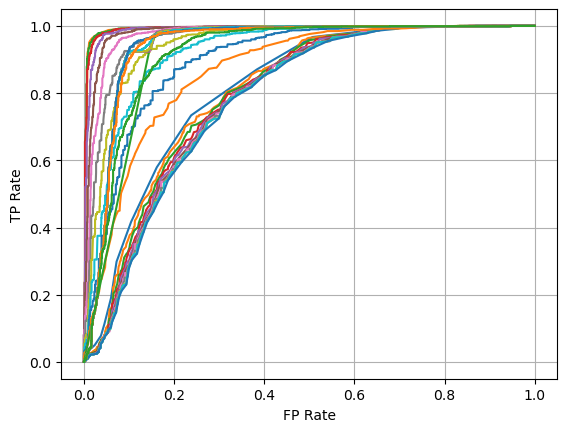

In [341]:
name = ['Levenshtein', 'Jaccard', 'Jaro']
columns = ['Levenshtein distance char', 'Levenshtein distance word', 
           'Jaccard distance char', 'Jaccard distance word', 
           'Jaro distance char', 'Jaro distance word']

the_highest_result = 0
the_hieghest_combination = ""

for i in range(3):
    method = name[i]
    for partition in range(0, 11, 1):
        
        partition = round(partition / 10, 2)
        
        combined_method = (
            partition * df[columns[2 * i]] +
            (1 - partition) * df[columns[2 * i + 1]]
        )

        y = np.array(df.iloc[:, 2]).transpose()
        pred = np.array(combined_method).transpose()
        
        fpr, tpr, thresholds = roc_curve(y, pred, pos_label = 0)
        roc_auc = round(metrics.auc(fpr, tpr), 10)
        
        if roc_auc > the_highest_result:
            the_highest_result = roc_auc
            the_hieghest_combination = method + ": char part = " + str(round(partition, 3)) + ', word part = ' + str(round(1 - partition, 3))
        
        plt.plot(fpr, tpr, label = method + " char = " + str(partition) + " word = " + str(round(1 - partition, 2)) + ' (' + str(roc_auc) + ')')

# plt.legend()    
plt.xlabel("FP Rate")
plt.ylabel("TP Rate")
plt.grid()
plt.show()   

In [342]:
the_highest_result

0.993339645

In [343]:
the_hieghest_combination

'Jaccard: char part = 0.1, word part = 0.9'